In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, Callback

# Load the CIFAR-10 dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Display a random image from each class

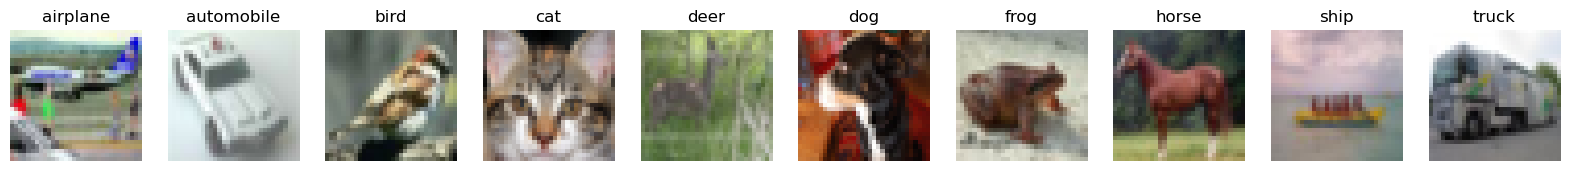

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig, ax = plt.subplots(1, len(class_names), figsize = (20, 20))
for i in range(len(class_names)):
    class_indices = np.where(y_train == i)[0]
    random_index = random.choice(class_indices)
    ax[i].imshow(x_train[random_index])
    ax[i].axis('off')
    ax[i].set_title(class_names[i])
plt.show()

# Preprocess the data

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Custom callback to stop training when accuracy is above 95%

In [5]:
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs['val_accuracy'] > 0.95:
            print(f'\nReached 95% validation accuracy. Stopping training.')
            self.model.stop_training = True

In [6]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Build the model

In [9]:
model = Sequential()
    # CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding = 'same',input_shape = x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(10))
model.add(Activation('softmax'))

In [10]:
# Find the best epoch using early stopping and custom callback
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)
cc = CustomCallback()
history = model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 25, batch_size = 1024, validation_split = 0.2, callbacks = [es, cc])

Epoch 1/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 531ms/step - accuracy: 0.2118 - loss: 2.1089 - val_accuracy: 0.3591 - val_loss: 1.7494
Epoch 2/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 520ms/step - accuracy: 0.3958 - loss: 1.6529 - val_accuracy: 0.4570 - val_loss: 1.5132
Epoch 3/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 527ms/step - accuracy: 0.4207 - loss: 1.6183 - val_accuracy: 0.5009 - val_loss: 1.3964
Epoch 4/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 519ms/step - accuracy: 0.4916 - loss: 1.4015 - val_accuracy: 0.5497 - val_loss: 1.2776
Epoch 5/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 584ms/step - accuracy: 0.5307 - loss: 1.3129 - val_accuracy: 0.5173 - val_loss: 1.3806
Epoch 6/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 676ms/step - accuracy: 0.5496 - loss: 1.2714 - val_accuracy: 0.6004 - val_loss: 1.1391
Epoch 7/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 687ms/step - accuracy: 0.5776 - loss: 1.1880 - val_accuracy: 0.6113 - val_loss: 1.1119
Epoch 8/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 675ms/step - accuracy: 0.6030 - loss: 1.1219 - val_accu

# Test the accuracy of the model

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7494 - loss: 0.7161
Test accuracy: 0.751


In [12]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Reshape to two dimensions
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# create categorical Labels
y_train = to_categorical(y_train)

# training using Random Forest and Decision Tree

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)

In [ ]:
print(to_categorical(y_test, 10).shape)
print(y_pred_tree.shape)

(10000, 10)
(10000, 10)


In [ ]:
mse_dt = mean_squared_error(to_categorical(y_test, 10), y_pred_tree)
mae_dt = mean_absolute_error(to_categorical(y_test, 10), y_pred_tree)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)

Mean squared error using decision tree:  0.14698
Mean absolute error using decision tree:  0.14698


In [16]:
# Increase number of trees and see the effect

model = RandomForestRegressor(n_estimators = 90, random_state = 30)
model.fit(x_train, y_train)

y_pred_RF = model.predict(x_test)

In [ ]:
mse_RF = mean_squared_error(to_categorical(y_test, 10), y_pred_RF)
mae_RF = mean_absolute_error(to_categorical(y_test, 10)y, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)